In [3]:
import pandas
import numpy
import matplotlib.pyplot as plt


In [25]:
# load dataset
dataframe = pandas.read_csv("data/records_second.csv", header=0)



In [26]:
dataframe.head()

,name,gh_version,pypi_version,status,diffoscope,repo_version,error
0,drf-flex-fields,1.0.2,1.0.2,Success,Diff,NaN,NaN
1,vincenty,0.1.4,0.1.4,Success,Diff,NaN,NaN
2,blaseball-mike,6.11.0,6.11.0,Success,Diff,NaN,NaN
3,eyecu-bumblebee,Failed,Failed,Failed,Error,NaN,NaN
4,flake8-annotations,Failed,Failed,Failed,Error,NaN,NaN


In [27]:
dataframe.describe()

,repo_version,error
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [28]:
dataframe['status'].value_counts()

Failed     43
Success    20
Name: status, dtype: int64

<AxesSubplot: >

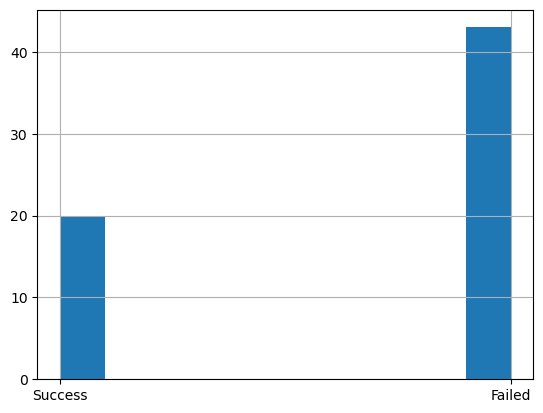

In [29]:
dataframe['status'].hist()

In [ ]:
# Check which records have "status" of Suceess and